In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001141807"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001141807
SIC,6035
Description,"SAVINGS INSTITUTION, FEDERALLY CHARTERED"
Name,1ST CONSTITUTION BANCORP
Ticker,FCCY


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,10.0,1.066700e+01,4.225896e+00,0.0,9.99,11.27,13.065,15.24
interest income,58.0,8.471741e+06,2.185242e+06,4044000.0,7184500.00,7699000.00,9868500.000,13915000.00
net income,58.0,1.473362e+06,8.139443e+05,-440000.0,893500.00,1333500.00,1949000.000,4011000.00
net interest income,59.0,6.544034e+06,2.421874e+06,2974000.0,4437000.00,6120000.00,8631000.000,11396000.00
provision for loan losses,56.0,3.691607e+05,5.784661e+05,0.0,103750.00,225000.00,500000.000,4100000.00


# Plots

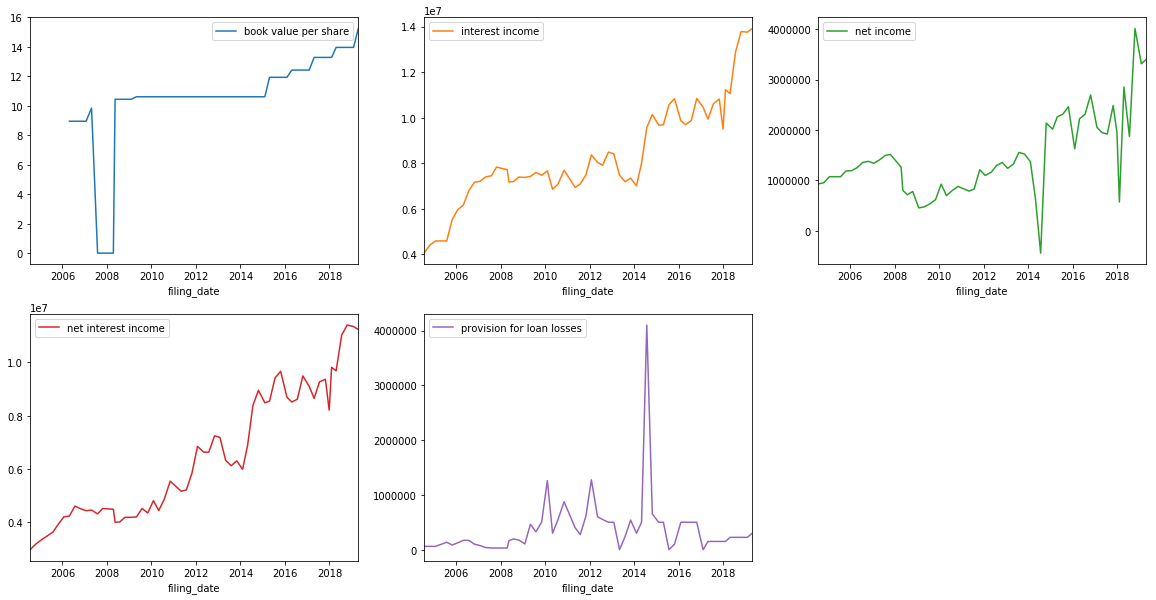

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0001141807 book value per share        2004Q2 to 2005Q4: 7 periods    missing   
           book value per share        2006Q2 to 2006Q4: 3 periods    missing   
           book value per share        2007Q3 to 2007Q4: 2 periods    missing   
           book value per share        2008Q2 to 2008Q4: 3 periods    missing   
           book value per share       2009Q2 to 2014Q4: 23 periods    missing   
           book value per share        2015Q2 to 2015Q4: 3 periods    missing   
           book value per share        2016Q2 to 2016Q4: 3 periods    missing   
           book value per share        2017Q2 to 2017Q4: 3 periods    missing   
           book value per share        2018Q2 to 2018Q4: 3 periods    missing   
           interest income             2005Q1 to 2005Q2: 2 periods    missing   
           interest income                                  2010Q4    missing   
           interest income                                  2018Q3    missing   
           net income                  2005Q1 to 2005Q2: 2 periods    missing   
           net income                                       2010Q4    missing   
           net income                                       2018Q2  duplicate   
           net income                                       2018Q3    missing   
           net interest income                              2005Q1    missing   
           net interest income                              2010Q4    missing   
           net interest income                              2018Q3    missing   
           provision for loan losses                        2005Q1    missing   
           provision for loan losses                        2010Q4    missing   
           provision for loan losses   2016Q1 to 2016Q3: 3 periods    missing   
           provision for loan losses                        2018Q3    missing   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0001141807 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                   Duplicate period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()